<a href="https://colab.research.google.com/github/FinchShi/COGS108_Repo/blob/main/DataCheckpointGroup047_Wi22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COGS 108 - Data Checkpoint

# Names

- Christoper Myers
- Claudia Handoyo
- Jingxin Shi
- Sapphire Wang
- Terho Koivisto

<a id='research_question'></a>
# Research Question

Does the percent change of a country's sustainability score every 2 years between 2008-2018 show a strong correlation with Purchasing Power Parity (PPP) percent changes every 2 years for the same 10 year period?



*   A sustainability score is a calculation made to measure the effectiveness of a country's growth/development on their GHG (Greenhouse Gas) emissions. We plan to calculate this sustainability score by standardizing a country's GDP or Gross Domestic Product as measured by Purchasing Power Parity (PPP) divided by the metric tons of carbon dioxide emitted (MtCO2e).





# Datasets

**Emission Data**
- Dataset Name: Greenhouse Gas Historical Emission Data
- Link to the dataset: https://www.kaggle.com/saurabhshahane/green-house-gas-historical-emission-data
- Source: World Resources Institute
- Number of observations: 195
- Description: This dataset contains historical data on the greenhouse gas (GHG) emissions for 194 countries from 1990-2018. We will use this data set to get greenhouse gas emissions data to calculate the sustainability score for each country.
- Observations: 

| Variable           	                        | Description 	|
|:--------------------	                        |:-------------	|
| Country            	                        | The name of the Country       	|
| Unit               	                        | The unit of GHG measured (MtCO2e)       	|
| Year               	                        | The year the obseravation is from           	|
   

**GDP per Capita Data**
- Dataset Name: GDP per capita all countries
- Link to the dataset: https://www.kaggle.com/nitishabharathi/gdp-per-capita-all-countries
- Source: The World Bank
- Number of observations: 260
- Description: This dataset contains data on the gross domestic product (GDP) by country with Purchasing Power Parity (PPP) data from the year 1990-2018. We will use this dataset to calculate the sustainability score by comparing it to the emissions data.
- Observations: 

| Variable           	                        | Description 	|
|:--------------------	                        |:-------------	|
| Country Name            	                        | The name of the Country       	|
| Country Code               	                        | The unique country code for each observed country     	|
| Year               	                        | The year of the observation            	|
   

**GDP Growth Data**
- Dataset Name: GDP annual growth for each country (1960 - 2020)
- Link to the dataset: https://www.kaggle.com/zackerym/gdp-annual-growth-for-each-country-1960-2020
- Source: The World Bank
- Number of observations: 264
- Description: Nominal GDP and GDP growth data for each country from the years 1960 to 2020. We will use this dataset to have an alternative method of describing the GDP, if needed.
- Observations: 

| Variable           	                        | Description 	|
|:--------------------	                        |:-------------	|
| Country Name            	                        | The name of the country observed       	|
| Country Code               	                        | The unique country code for each observed country     	|
| Year               	                        | The year of the observation            	|
| GDP (current US$)               	                        | Nominal GDP of the country measured in USD            	|
   


To combine all the datasets together we will use the names of each country to combine all the data. We will only be looking at a ten-year period so we will cut out a lot of the observations. The naming conventions for the two datasets we plan on merging are different so we will create a method to standardize the country names. When we are done we should have one dataset with both emissions and PPP data.




# Setup

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings

In [ ]:
# Table viewing preference
pd.set_option('display.max_columns', 50)

# Data visualization settings
sns.set_style("darkgrid", {"axes.facecolor": "0.8"})
sns.set(font_scale = 1.2)

#### Load In Datasets
First we load the two datasets from csv file, they need to be cleaned because they have different column names, different names for the same countries and contains null value.

In [ ]:
# Greenhouse gas emissions for each country, measured in MtCO2 (Megatons of CO_2)
ghg_emissions = pd.read_csv("ghg-emissions.csv")
ghg_emissions.head()

,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,China,MtCO2e,2873.71,3023.38,3154.54,3377.79,3528.81,3918.30,3954.75,3963.61,4103.23,4053.37,4249.70,4459.91,4769.03,5386.89,6135.95,6862.81,7547.54,8165.43,8455.65,9046.19,9872.37,10364.83,10690.04,11144.76,11155.76,11149.68,11207.66,11408.26,11705.81
1,United States,MtCO2e,5543.47,5501.92,5583.80,5691.26,5782.20,5843.90,6010.62,6258.47,6293.80,6291.25,6446.20,6406.04,6246.95,6306.12,6387.22,6401.12,6306.81,6397.67,6220.21,5793.66,6041.59,5796.78,5550.87,5690.79,5711.15,5586.69,5676.92,5613.64,5794.35
2,India,MtCO2e,1009.44,1064.49,1096.71,1128.44,1174.78,1240.44,1289.63,1348.09,1382.26,1460.24,1498.20,1747.49,1769.79,1817.42,1905.13,1977.76,2073.67,2219.62,2317.48,2467.78,2576.93,2610.32,2758.53,2816.49,2988.34,3002.17,3073.24,3202.82,3346.63
3,Russia,MtCO2e,2885.12,2788.70,2551.94,2294.62,2011.47,1930.88,1889.18,1755.59,1740.23,1772.68,1831.09,1455.44,1477.17,1556.63,1601.63,1608.10,1682.12,1690.16,1727.25,1575.54,1690.93,1864.86,1886.41,1844.48,1841.26,1791.21,1918.26,1939.26,1992.08
4,Indonesia,MtCO2e,1257.10,1274.43,1295.01,1311.27,1327.87,1360.88,1179.00,2142.82,1373.56,1261.56,1191.82,1019.35,1500.98,1167.69,1517.02,1242.70,1655.23,1100.24,1087.94,1483.61,1125.25,1675.72,1695.27,1636.17,2016.28,2070.24,1453.23,1466.05,1703.86


In [ ]:
# GDP per capita for each country
gdp_per_capita = pd.read_csv("gdp-per-capita.csv")
gdp_per_capita.head()

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,30512.683910,30728.054500,33120.054180,32117.912320,30862.222690,31387.282960,34176.464600,35207.577240,36362.219320,37865.493490,38515.263800,34693.086750,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,839.485886,888.153370,885.840819,979.273979,1031.643135,1176.126357,1218.118215,1454.663015,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,3027.341795,3037.721175,3097.307292,3191.266323,3564.096026,3614.607278,3978.697194,4555.185842,5048.876449,5697.251328,6221.423373,6092.783245,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,3021.014738,3471.652592,3861.334172,4301.352799,4661.371553,4994.518807,5422.778462,5865.306196,6559.783257,7276.302969,8228.374239,8814.810856,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,8797.662606,8938.451524,9415.632618,9584.108301,9581.797143,9974.641898,10937.316090,11646.486090,12442.187940,13041.925530,13739.727750,13640.846780,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN


# Data Cleaning

Our datasets both include a column for each country in the world and some territories with their respective values--GDP per capita and greenhouse has emissions. 

They each started with data going back to 1990, but we are only interested in data for the last two years included in the set--2009 to 2018. Thus, our first step was to remove the unused data from each set. Each one also included other unnecessary columns, so we sought to remove those as well.

To combine the data sets we also needed consistency between the column names, so they are updated to use the same title for country name

### 1. Remove Unneeded Columns

For this first step of cleaning, we are removing columns from 1990 to 2008 from both datasets, since we are only interested in the recent ten years, so that our data only contains columns from 2009 to 2018.

In [ ]:
# Limit date range to just 10 years by removing unneeded columns (2009-2018)
ghg_remove_cols = list(map(str, range(1990,2009)))
ghg_emissions.drop(ghg_remove_cols, axis=1, inplace=True)
ghg_emissions.drop("unit", axis=1, inplace=True)

gdp_remove_cols = list(map(str, range(1990,2009))) + ['2019']
gdp_per_capita.drop(gdp_remove_cols, axis=1, inplace=True)
gdp_per_capita.drop("Country Code", axis=1, inplace=True)

### 2. Rename columns and reset index
The two datasets have different columns names for the column "country", one is "Country/Region" and another one is country with a space. This is bad when merging the two datasets, so we rename them both for consistency across datasets.

In [ ]:
# Rename column and sort for consistency across datasets
ghg_emissions.rename(columns={"Country/Region": "Country"}, inplace=True)
gdp_per_capita.rename(columns={"Country ": "Country"}, inplace=True)
ghg_emissions.sort_values(by=['Country'], inplace=True)
ghg_emissions.reset_index(drop=True, inplace=True)

#### Checkpoint: Current State of Data
Now the column names are matched, but we still need to work on matching the country names. Also, we can see that some countries have null values at certain years, so this have to be further cleaned after merging.

In [ ]:
ghg_emissions.head()

,Country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,37.08,45.03,58.41,66.50,74.55,84.37,93.48,95.53,97.45,99.08
1,Albania,7.73,8.01,8.79,8.40,8.60,9.08,9.01,9.49,10.06,9.84
2,Algeria,170.49,171.63,179.41,189.38,193.39,203.53,211.46,210.03,212.33,219.11
3,Andorra,0.62,0.63,0.60,0.60,0.59,0.58,0.58,0.59,0.59,0.59
4,Angola,128.34,133.35,133.54,133.21,135.41,136.50,139.09,138.85,137.32,124.59


In [ ]:
gdp_per_capita.head()

,Country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,34693.086750,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN
1,Afghanistan,1454.663015,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208
2,Angola,6092.783245,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165
3,Albania,8814.810856,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400
4,Arab World,13640.846780,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600


### 3. Fix Country Naming Discrepancies Between Data Sets
We noticed that the two datasets may have different naming for the same country, so we picked out the countries that have different names between the two datasets. 

In [ ]:
# Which countries are not common between the two sets (most likely because of naming differences)
naive_countries = gdp_per_capita.merge(ghg_emissions, on="Country", how='inner', suffixes=['_ghg', '_gdp'])['Country']
ghg_countries = ghg_emissions['Country']
diff = list(set(naive_countries) - set(ghg_countries)) + list(set(ghg_countries) - set(naive_countries))
diff

['Andorra',
 'Saint Lucia',
 'Iran',
 'Niue',
 'Saint Vincent and the Grenadines',
 'Brunei',
 'Macedonia',
 'Data source',
 'Bahamas',
 'Kyrgyzstan',
 'Egypt',
 'Democratic Republic of the Congo',
 'Laos',
 'North Korea',
 'Yemen',
 'Syria',
 'Micronesia',
 'Cook Islands',
 'Russia',
 'Cape Verde',
 'Saint Kitts and Nevis',
 'Data for',
 'Gambia',
 'Republic of Congo',
 'Slovakia',
 "Côte d'Ivoire",
 'Cuba',
 'South Korea',
 'Venezuela']

We now picked out all the countries that are named differently across the two datasets. We rename the countries on GHG data set for consistency across datasets. This way, the country names on the two datasets are matched, so we are ready to merge them.

In [ ]:
# Change country names on GHG dataset so they match between the two
gdp_per_capita.replace({
    "Russian Federation": "Russia",
    "Bahamas, The": "Bahamas",
    "Iran, Islamic Rep.": "Iran",
    "Venezuela, RB": "Venezuela",
    "Gambia, The": "Gambia",
    "Cote d'Ivoire": "Côte d'Ivoire",
    "Cabo Verde": "Cape Verde",
    "Micronesia, Fed. Sts.": "Micronesia",
    "Syrian Arab Republic": "Syria",
    "Lao PDR": "Laos",
    "North Macedonia": "Macedonia",
    "St. Kitts and Nevis": "Saint Kitts and Nevis",
    "Korea, Dem. People?s Rep.": "North Korea",
    "Korea, Rep.": "South Korea",
    "Slovak Republic": "Slovakia",
    "St. Lucia": "Saint Lucia",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Congo, Dem. Rep.": "Democratic Republic of the Congo",
    "Congo, Rep.": "Republic of Congo",
    "Yemen, Rep.": "Yemen",
    "Brunei Darussalam": "Brunei",
    "Egypt, Arab Rep.": "Egypt",
    "Kyrgyz Republic": "Kyrgyzstan"
}, inplace=True)

In [ ]:
# Check again--is the difference smaller now?
naive_countries = gdp_per_capita.merge(ghg_emissions, on="Country", how='inner', suffixes=['_ghg', '_gdp'])['Country']
diff = list(set(naive_countries) - set(ghg_countries)) + list(set(ghg_countries) - set(naive_countries))
diff

['Andorra', 'Data source', 'Cook Islands', 'Cuba', 'Niue', 'Data for']

We now see that Andorra, the Cook Islands, Niue, and Cuba do not have GDP per capita data so we will not be able to perform analysis on them.

### 4. Combine Data Sets
We combined the two datasets and added suffixes gdp,ghg. The data from GHG dataset is append to the end of the gdp dataset. We will work on this combined dataset from this point.

In [ ]:
combined_data = gdp_per_capita.merge(ghg_emissions, on="Country", how='inner', suffixes=['_gdp', '_ghg'])
combined_data.head(10)

,Country,2009_gdp,2010_gdp,2011_gdp,2012_gdp,2013_gdp,2014_gdp,2015_gdp,2016_gdp,2017_gdp,2018_gdp,2009_ghg,2010_ghg,2011_ghg,2012_ghg,2013_ghg,2014_ghg,2015_ghg,2016_ghg,2017_ghg,2018_ghg
0,Afghanistan,1454.663015,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,37.08,45.03,58.41,66.50,74.55,84.37,93.48,95.53,97.45,99.08
1,Angola,6092.783245,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,128.34,133.35,133.54,133.21,135.41,136.50,139.09,138.85,137.32,124.59
2,Albania,8814.810856,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,7.73,8.01,8.79,8.40,8.60,9.08,9.01,9.49,10.06,9.84
3,United Arab Emirates,56975.529380,54230.173670,56574.288180,58961.202010,62641.836990,66443.997580,70212.093010,72386.090470,73137.870190,75075.257410,202.08,208.58,214.63,226.57,237.63,240.02,252.85,259.65,269.82,263.24
4,Argentina,16753.394890,18524.856760,19817.450480,19764.225010,20365.613350,20008.320640,20551.833190,20130.408030,20843.155070,20610.568550,424.07,429.81,410.64,414.84,424.70,421.76,428.37,396.27,397.70,395.50
5,Armenia,6326.657969,6565.678660,7019.767748,7649.061531,8003.087763,8405.073655,8727.385447,8808.572714,9620.818491,10343.175590,8.02,7.88,8.30,9.29,9.22,9.18,9.18,9.54,9.32,9.40
6,Antigua and Barbuda,21852.203080,20134.817250,19876.215320,20672.912060,20656.381580,21599.199140,22422.029390,23670.302260,24644.551880,26868.133520,1.93,1.04,1.07,1.29,1.06,1.07,1.10,1.13,1.16,1.21
7,Australia,40300.308230,39324.368950,41965.358420,42826.789580,45902.047950,46880.220660,46276.150690,47305.880020,49628.811810,51663.365090,633.80,601.14,644.74,643.12,555.26,566.21,566.47,577.32,623.08,619.26
8,Austria,40926.523760,42006.046880,44452.732750,46457.345780,47922.049120,48799.715470,49879.266470,51809.513630,53937.066380,55454.689290,70.83,76.55,73.72,70.50,71.05,67.28,68.41,68.53,70.71,67.85
9,Azerbaijan,15162.887800,15884.044790,15754.152360,16193.395670,17216.178530,17808.901900,17973.090670,17417.086690,17525.279630,18044.136780,72.90,77.18,79.47,80.64,80.18,80.36,79.18,79.97,78.61,78.35


As previously noticed that some countries contain null values at certain years, so we are finding the where the null values are located.

Country     False
2009_gdp     True
2010_gdp     True
2011_gdp     True
2012_gdp     True
2013_gdp     True
2014_gdp     True
2015_gdp     True
2016_gdp     True
2017_gdp     True
2018_gdp     True
2009_ghg    False
2010_ghg    False
2011_ghg    False
2012_ghg    False
2013_ghg    False
2014_ghg    False
2015_ghg    False
2016_ghg    False
2017_ghg    False
2018_ghg    False
dtype: bool


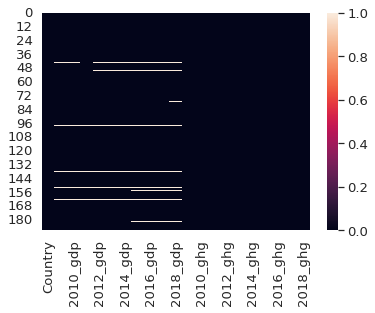

In [ ]:
# Check and take care of null values
# this heatmap shows us the null values in our dataset
sns.heatmap(combined_data.isnull())
# we will manually to see where the nulls are
print(combined_data.isnull().any())

From the heat map, we can see that GHG has no gaps, but GDP has gaps. The length of each white line tells how many years of data are missing from that country. There are only 9 countries contain null values, so we decided to drop these 9 countries because our sample size is very large. So after dropping these 9 countries, we'll still have enough data to work with. 

In [ ]:
# we can't calculate with null values, so these 9 countries have to be dropped
# dropped: Djibouti, Eritrea, Iran, Liechtenstein, North Korea, Somlalia, South Sudan, Syria, Venezuela
nonull_df = combined_data.dropna(how = 'any')

Check if we have any duplicate values and turns out we don't have any, which is good!

In [ ]:
# checking for irregular duplicate values
# checking for duplicates
print(nonull_df.duplicated().any())
# we have no duplicates
nodupe_df = nonull_df.copy()

False


Make sure all values left in the columns are all numerical values, this way we can perform calculations later.

In [ ]:
# Check and take care of string/irregular values
# we have no irregular data types in the dataframe
print('What is our data type? ', nodupe_df.dtypes)

# we have expected data types
type_df = nodupe_df.copy()

What is our data type?  Country      object
2009_gdp    float64
2010_gdp    float64
2011_gdp    float64
2012_gdp    float64
2013_gdp    float64
2014_gdp    float64
2015_gdp    float64
2016_gdp    float64
2017_gdp    float64
2018_gdp    float64
2009_ghg    float64
2010_ghg    float64
2011_ghg    float64
2012_ghg    float64
2013_ghg    float64
2014_ghg    float64
2015_ghg    float64
2016_ghg    float64
2017_ghg    float64
2018_ghg    float64
dtype: object


Visualize the data to check if they are in good shape. Notice we have a few outliers that seems far away from the range, but they are all solid gdp data, so we keep them in our dataset.

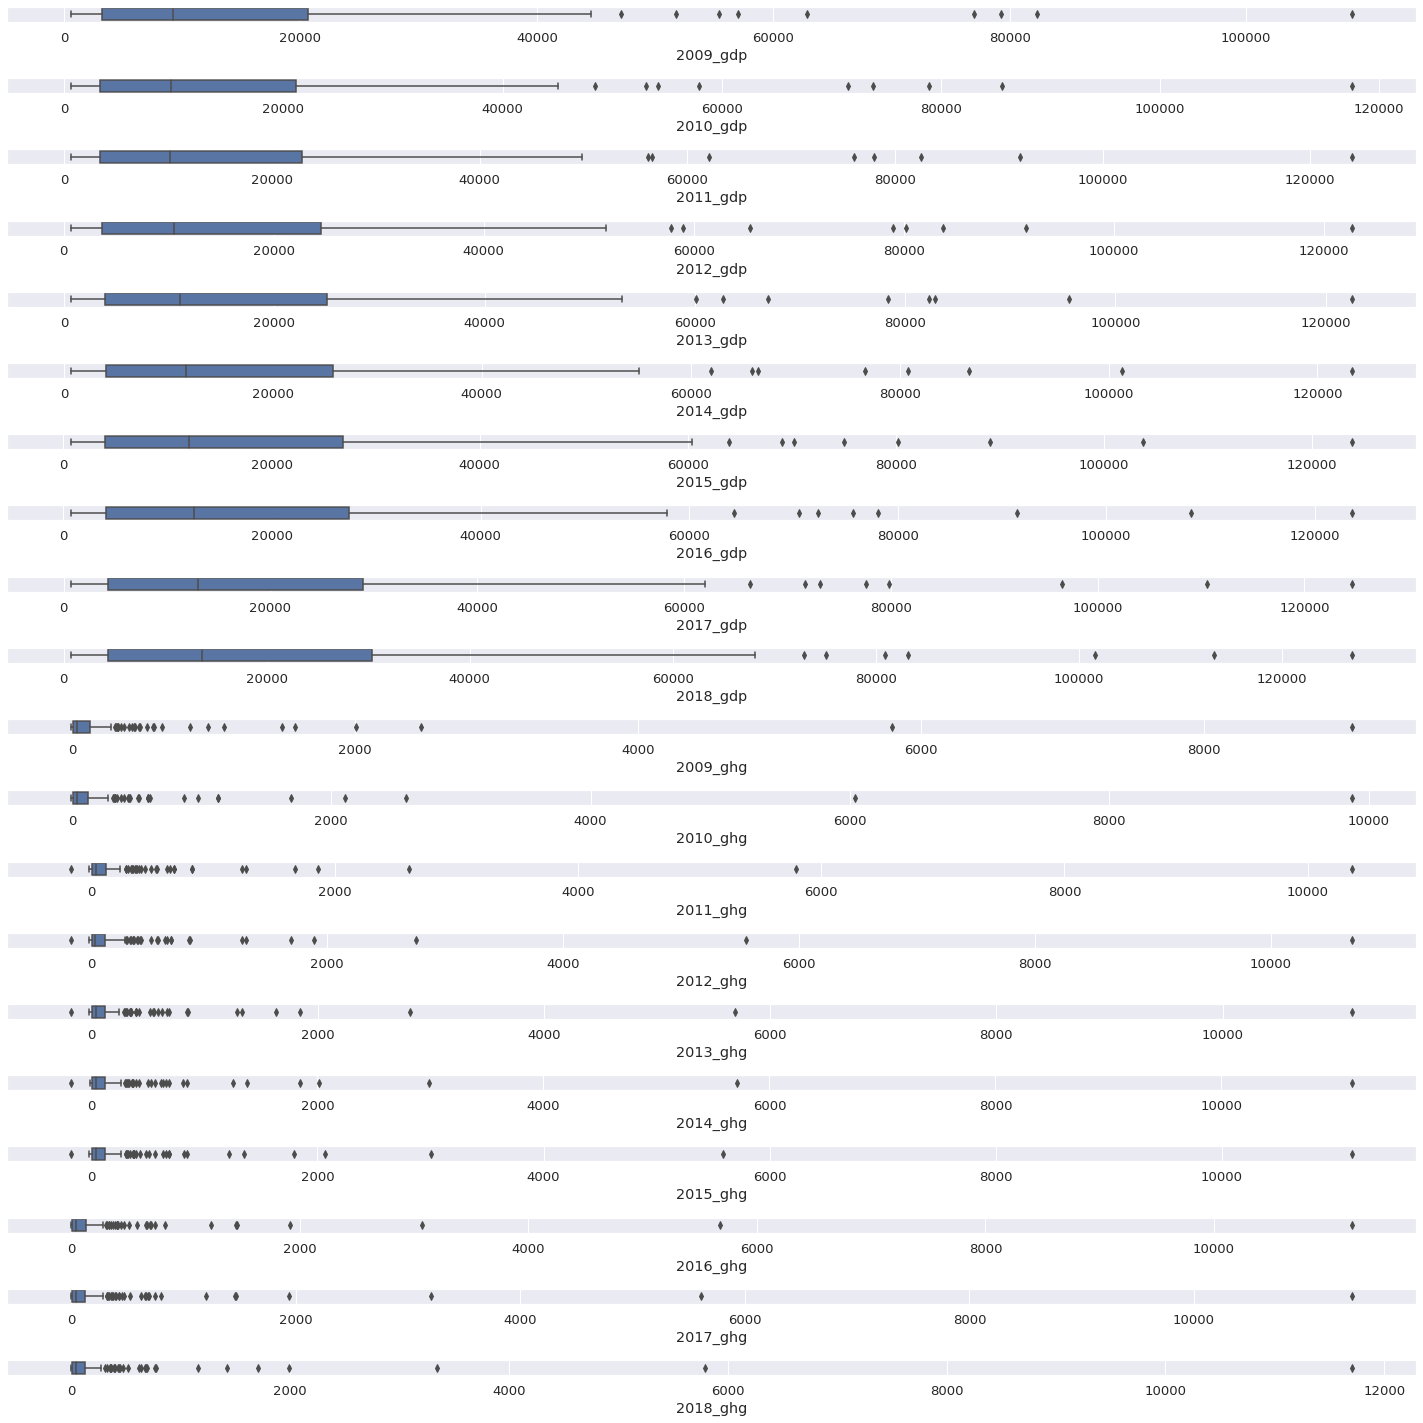

In [ ]:
# visualize the outliers in our dataframe
fig, axes = plt.subplots(20, 1, figsize = (20, 20))
count = 0

for column in type_df.columns[1::]:
  sns.boxplot(x = type_df[column], ax = axes[count])
  count += 1

plt.tight_layout()

# by indexing after the first column, we can bypass the issue where sns can't plot Country 'obj' 
# but our outliers all seem necessary for consideration, so we won't remove them

Now our dataset contains pure numerical values. So it is clean and ready to use for future wrangling.

In [ ]:
# now our dataframe is clean
clean_df = type_df.copy()

# visualizing our clean dataframe
clean_df.head()

,Country,2009_gdp,2010_gdp,2011_gdp,2012_gdp,2013_gdp,2014_gdp,2015_gdp,2016_gdp,2017_gdp,2018_gdp,2009_ghg,2010_ghg,2011_ghg,2012_ghg,2013_ghg,2014_ghg,2015_ghg,2016_ghg,2017_ghg,2018_ghg
0,Afghanistan,1454.663015,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,37.08,45.03,58.41,66.50,74.55,84.37,93.48,95.53,97.45,99.08
1,Angola,6092.783245,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,128.34,133.35,133.54,133.21,135.41,136.50,139.09,138.85,137.32,124.59
2,Albania,8814.810856,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,7.73,8.01,8.79,8.40,8.60,9.08,9.01,9.49,10.06,9.84
3,United Arab Emirates,56975.529380,54230.173670,56574.288180,58961.202010,62641.836990,66443.997580,70212.093010,72386.090470,73137.870190,75075.257410,202.08,208.58,214.63,226.57,237.63,240.02,252.85,259.65,269.82,263.24
4,Argentina,16753.394890,18524.856760,19817.450480,19764.225010,20365.613350,20008.320640,20551.833190,20130.408030,20843.155070,20610.568550,424.07,429.81,410.64,414.84,424.70,421.76,428.37,396.27,397.70,395.50
